In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/longley.csv").rename(columns=str.lower)
df

,gnp.deflator,gnp,unemployed,armed.forces,population,year,employed
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221
5,98.1,346.999,193.2,359.4,113.270,1952,63.639
6,99.0,365.385,187.0,354.7,115.094,1953,64.989
7,100.0,363.112,357.8,335.0,116.219,1954,63.761
8,101.2,397.469,290.4,304.8,117.388,1955,66.019
9,104.6,419.180,282.2,285.7,118.734,1956,67.857


In [3]:
df = df.drop("population", axis=1)

In [4]:
features = df.drop(columns='employed', axis=1).columns
target = "employed"

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scalled_df = df.copy()
scalled_df[features] = StandardScaler().fit_transform(df[features])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = scalled_df[features]  
y = scalled_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [9]:
from sklearn.linear_model import Ridge

In [10]:
lambdas = [
    10**(-3 + 0.2 * i)
    for i in range(0, 25 + 1)
]

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
train_errors, test_errors = [], []

for alpha in lambdas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

In [13]:
import matplotlib.pyplot as plt

In [14]:
mse_linear_4 = 0.20886527605294597

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_8507/1081831192.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')


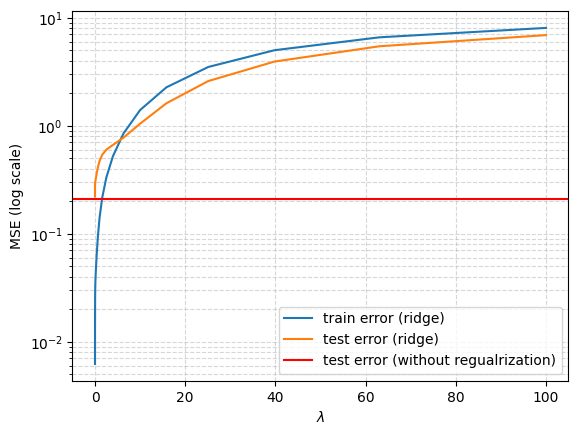

In [16]:
plt.semilogy(
    lambdas,
    train_errors,
    label='train error (ridge)',
        
)
plt.semilogy(
    lambdas,
    test_errors,
    label='test error (ridge)'
)

plt.axhline(
    mse_linear_4,
    label="test error (without regualrization)",
    color='red'
)

plt.xlabel('$\lambda$')
plt.ylabel('MSE (log scale)')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()